# Analisis de resultados del experimento 1 - Disponibilidad

In [27]:
import pandas as pd
df_results_exp1 = pd.read_csv('results.jtl')

In [28]:
df_results_exp1.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1744066862505,167,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,322,140,1,1,http://localhost:8080/monitor/ms-order-service,164,0,7
1,1744066862874,159,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,321,140,1,1,http://localhost:8080/monitor/ms-order-service,159,0,0
2,1744066863278,174,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,322,140,1,1,http://localhost:8080/monitor/ms-order-service,174,0,0
3,1744066863677,10,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,380,140,1,1,http://localhost:8080/monitor/ms-order-service,10,0,0
4,1744066864077,171,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,322,140,1,1,http://localhost:8080/monitor/ms-order-service,171,0,0


In [29]:
# Read a folder full of json files and put it into a dataframe
import os
import json
import pandas as pd
def read_json_files_in_folder(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            with open(os.path.join(folder_path, filename), 'r') as f:
                data.append(json.load(f))
    return pd.DataFrame(data)
df_results_exp1 = read_json_files_in_folder('./responses/')
df_results_exp1.head()


,service,status,message,metrics
0,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 188.94314765930176, 'created..."
1,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 173.86484146118164, 'created..."
2,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 186.6438388824463, 'created_..."
3,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 174.5758056640625, 'created_..."
4,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 170.5307960510254, 'created_..."


In [30]:
# Expand metrics from nested json
def expand_metrics(df):
    metrics = df['metrics'].apply(pd.Series)
    metrics.columns = [f'metric_{col}' for col in metrics.columns]
    return pd.concat([df.drop(columns=['metrics']), metrics], axis=1)
df_results_exp1 = expand_metrics(df_results_exp1)
df_results_exp1.head()

,service,status,message,metric_total_time_ms,metric_created_order_id,metric_timestamp,metric_alert_id
0,ms-order-service,healthy,Flujo completo exitoso,188.943148,1641.0,2025-04-07T18:01:09.469664,NaN
1,ms-order-service,healthy,Flujo completo exitoso,173.864841,1680.0,2025-04-07T18:01:25.853790,NaN
2,ms-order-service,healthy,Flujo completo exitoso,186.643839,1696.0,2025-04-07T18:01:32.266657,NaN
3,ms-order-service,healthy,Flujo completo exitoso,174.575806,1722.0,2025-04-07T18:01:42.654179,NaN
4,ms-order-service,healthy,Flujo completo exitoso,170.530796,1644.0,2025-04-07T18:01:11.050619,NaN


In [32]:
df_results_exp1.head()

,service,status,message,metric_total_time_ms,metric_created_order_id,metric_timestamp,metric_alert_id
0,ms-order-service,healthy,Flujo completo exitoso,188.943148,1641.0,2025-04-07T18:01:09.469664,NaN
1,ms-order-service,healthy,Flujo completo exitoso,173.864841,1680.0,2025-04-07T18:01:25.853790,NaN
2,ms-order-service,healthy,Flujo completo exitoso,186.643839,1696.0,2025-04-07T18:01:32.266657,NaN
3,ms-order-service,healthy,Flujo completo exitoso,174.575806,1722.0,2025-04-07T18:01:42.654179,NaN
4,ms-order-service,healthy,Flujo completo exitoso,170.530796,1644.0,2025-04-07T18:01:11.050619,NaN


/var/folders/hr/d50662mj6z38mpr1xn8smf8w0000gn/T/ipykernel_39489/2708453364.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette=['#2ecc71', '#e74c3c'])


Text(0.5, 0.9, 'Disponibilidad: 96.00%')

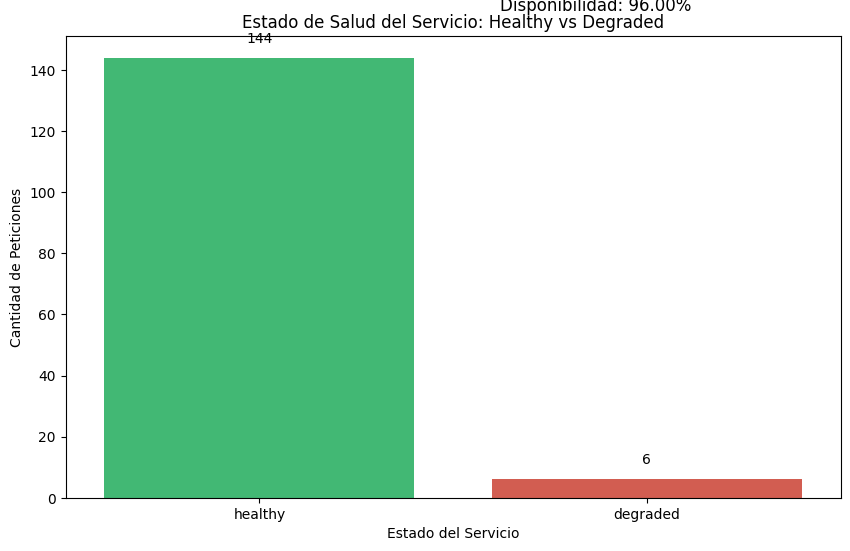

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de ocurrencias por estado
status_counts = df_results_exp1['status'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette=['#2ecc71', '#e74c3c'])

# Añadir etiquetas y título
plt.xlabel('Estado del Servicio')
plt.ylabel('Cantidad de Peticiones')
plt.title('Estado de Salud del Servicio: Healthy vs Degraded')

# Añadir números en las barras
for i, count in enumerate(status_counts.values):
    plt.text(i, count + 5, str(count), ha='center')

# Mostrar porcentajes
total = status_counts.sum()
healthy_pct = (status_counts.get('healthy', 0) / total) * 100
degraded_pct = (status_counts.get('degraded', 0) / total) * 100

# Añadir una anotación con los porcentajes
plt.annotate(f'Disponibilidad: {healthy_pct:.2f}%', 
             xy=(0.5, 0.9), 
             xycoords='figure fraction', 
             fontsize=12)

/var/folders/hr/d50662mj6z38mpr1xn8smf8w0000gn/T/ipykernel_39489/1287361074.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='status', y='metric_total_time_ms', data=df_results_exp1,


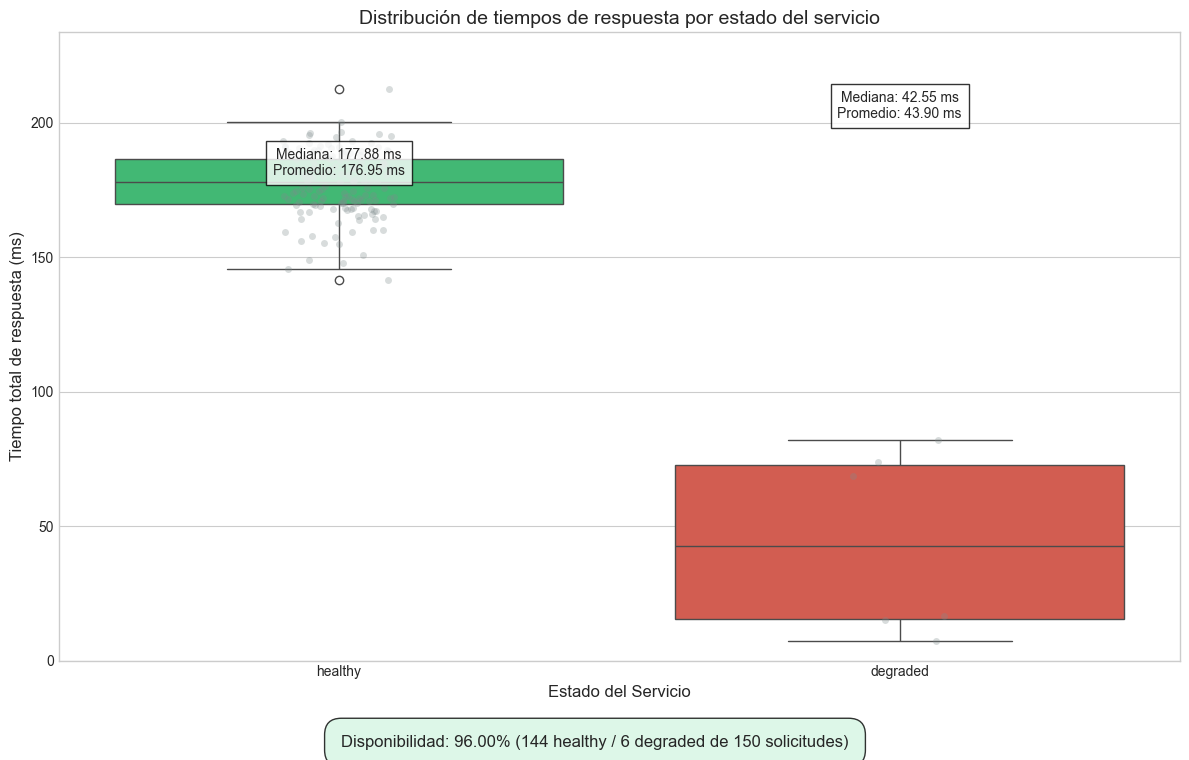

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar el estilo de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Crear la figura con un tamaño adecuado
plt.figure(figsize=(12, 8))

# Crear el boxplot agrupado por status
ax = sns.boxplot(x='status', y='metric_total_time_ms', data=df_results_exp1, 
            palette={'healthy': '#2ecc71', 'degraded': '#e74c3c'})

# Añadir puntos individuales para ver la distribución
sns.stripplot(x='status', y='metric_total_time_ms', data=df_results_exp1,
             jitter=True, alpha=0.3, color='#7f8c8d')

# Añadir etiquetas y título
plt.xlabel('Estado del Servicio', fontsize=12)
plt.ylabel('Tiempo total de respuesta (ms)', fontsize=12)
plt.title('Distribución de tiempos de respuesta por estado del servicio', fontsize=14)

# Añadir estadísticas descriptivas
for status in df_results_exp1['status'].unique():
    data = df_results_exp1[df_results_exp1['status'] == status]['metric_total_time_ms']
    median = np.median(data)
    mean = np.mean(data)
    
    # Añadir texto con estadísticas
    y_pos = df_results_exp1['metric_total_time_ms'].max() * 0.85
    if status == 'degraded':
        y_pos = df_results_exp1['metric_total_time_ms'].max() * 0.95
        
    plt.text(
        list(df_results_exp1['status'].unique()).index(status), 
        y_pos,
        f'Mediana: {median:.2f} ms\nPromedio: {mean:.2f} ms',
        ha='center', 
        bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5}
    )

# Ajustar escala del eje Y si hay valores atípicos extremos
q1 = df_results_exp1['metric_total_time_ms'].quantile(0.25)
q3 = df_results_exp1['metric_total_time_ms'].quantile(0.75)
iqr = q3 - q1
upper_whisker = min(df_results_exp1['metric_total_time_ms'].max(), q3 + 1.5 * iqr)
plt.ylim(0, upper_whisker * 1.1)

# Calcular métricas de disponibilidad
total_requests = len(df_results_exp1)
healthy_requests = df_results_exp1['status'].value_counts().get('healthy', 0)
degraded_requests = df_results_exp1['status'].value_counts().get('degraded', 0)
availability = (healthy_requests / total_requests) * 100

# Añadir anotación con información de disponibilidad
plt.figtext(0.5, 0.01, 
           f'Disponibilidad: {availability:.2f}% ({healthy_requests} healthy / {degraded_requests} degraded de {total_requests} solicitudes)',
           ha='center', 
           fontsize=12,
           bbox={'facecolor': '#d5f5e3', 'alpha': 0.8, 'pad': 8, 'boxstyle': 'round,pad=1'})

# Ajustar límites de la gráfica
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Mostrar la gráfica
plt.show()

In [48]:
# Filtrar solo las filas con estado "degraded"
degraded_rows = df_results_exp1[df_results_exp1['status'] == 'degraded']

# Ver el número total de filas degradadas
print(f"Total de filas con estado 'degraded': {len(degraded_rows)}")

# Verificar si la columna 'message' existe en tu DataFrame
if 'message' in degraded_rows.columns:
    # Analizar los mensajes para categorizar los errores
    create_order_failures = degraded_rows[degraded_rows['message'].str.contains('Create order|creación de orden|crear la orden', case=False, na=False)]
    update_order_failures = degraded_rows[degraded_rows['message'].str.contains('Update order|actualización de orden|actualizar la orden', case=False, na=False)]
    
    print(f"\nErrores en 'Create order': {len(create_order_failures)}")
    print(f"Errores en 'Update order': {len(update_order_failures)}")
    
    # Ver los mensajes de error más comunes
    print("\nMensajes de error más comunes:")
    print(degraded_rows['message'].value_counts().head(5))
    
    # Mostrar ejemplos de cada tipo de error
    if len(create_order_failures) > 0:
        print("\nEjemplo de error en Create order:")
        print(create_order_failures['message'].iloc[0])
    
    if len(update_order_failures) > 0:
        print("\nEjemplo de error en Update order:")
        print(update_order_failures['message'].iloc[0])
else:
    # Si no existe la columna 'message', buscar en otras columnas que puedan contener información sobre errores
    print("La columna 'message' no existe en el DataFrame.")
    
    # Mostrar las columnas disponibles que podrían contener información sobre errores
    potential_error_columns = [col for col in degraded_rows.columns if any(term in col.lower() for term in ['error', 'message', 'detail', 'exception'])]
    
    if potential_error_columns:
        print(f"Columnas que podrían contener información sobre errores: {potential_error_columns}")
        
        # Analizar la primera de estas columnas
        first_error_col = potential_error_columns[0]
        print(f"\nAnálisis de la columna '{first_error_col}':")
        print(degraded_rows[first_error_col].value_counts().head(5))
    else:
        # Como último recurso, mostrar todas las columnas disponibles
        print("No se encontraron columnas que puedan contener información sobre errores.")
        print("Columnas disponibles:")
        print(degraded_rows.columns.tolist())
        
        # Mostrar las primeras filas para análisis manual
        print("\nPrimeras filas de datos degradados para análisis manual:")
        display(degraded_rows.head())

Total de filas con estado 'degraded': 6

Errores en 'Create order': 3
Errores en 'Update order': 3

Mensajes de error más comunes:
message
Error en monitoreo: Update order endpoint returned 500    3
Error en monitoreo: Create order endpoint returned 500    3
Name: count, dtype: int64

Ejemplo de error en Create order:
Error en monitoreo: Create order endpoint returned 500

Ejemplo de error en Update order:
Error en monitoreo: Update order endpoint returned 500
